# INTRODUCTION
Welcome to the Bellabeat data analysis case study! In this case study, you will perform many real-world tasks of a junior data
analyst. You will imagine you are working for Bellabeat, a high-tech manufacturer of health-focused products for women, and
meet different characters and team members. In order to answer the key business questions, you will follow the steps of the
data analysis process: ask, prepare, process, analyze, share, and act. Along the way, the Case Study Roadmap tables —
including guiding questions and key tasks — will help you stay on the right path.

# CASE STUDY: How Can a Wellness Technology Company Play It Smart?



## About the company
Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused smart products.
Sršen used her background as an artist to develop beautifully designed technology that informs and inspires women around
the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with
knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned
itself as a tech-driven wellness company for women.

## Scenario
You are a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused
products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the
global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart
device fitness data could help unlock new growth opportunities for the company. You have been asked to focus on one of
Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The
insights you discover will then help guide marketing strategy for the company. You will present your analysis to the Bellabeat
executive team along with your high-level recommendations for Bellabeat’s marketing strategy.




# ASK

Sršen asks you to analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart
devices. She then wants you to select one Bellabeat product to apply these insights to in your presentation. These questions
will guide your analysis:
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?


## Deliverables
1. A clear summary of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top high-level content recommendations based on your analysis

# PREPARE

**About Data**

This Kaggle data set contains personal fitness tracker from 30 fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It also includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

The dataset was collected from April 12, 2016 to May 12, 2016. There are 18 .CSV files in total and generated in both wide and long format.

**Data limitations**

The data has some limitations which could Undermine the results of the analysis Such limitations to take into consideration are:
1. Missing demographics
2. Small simple size
3. Short time period of Data collection

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import CategoricalDtype
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fitbit-tracker-data/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit-tracker-data/weightLogInfo_merged.csv
/kaggle/input/fitbit-tracker-data/sleepDay_merged.csv
/kaggle/input/fitbit-tracker-data/dailyIntensities_merged.csv
/kaggle/input/fitbit-tracker-data/minuteIntensitiesWide_merged.csv
/kaggle/input/fitbit-tracker-data/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit-tracker-data/dailyCalories_merged.csv
/kaggle/input/fitbit-tracker-data/hourlyCalories_merged.csv
/kaggle/input/fitbit-tracker-data/heartrate_seconds_merged.csv
/kaggle/input/fitbit-tracker-data/minuteSleep_merged.csv
/kaggle/input/fitbit-tracker-data/hourlyIntensities_merged.csv
/kaggle/input/fitbit-tracker-data/hourlySteps_merged.csv
/kaggle/input/fitbit-tracker-data/minuteStepsNarrow_merged.csv
/kaggle/input/fitbit-tracker-data/dailySteps_merged.csv
/kaggle/input/fitbit-tracker-data/minuteStepsWide_merged.csv
/kaggle/input/fitbit-tracker-data/minuteIntensitiesNarrow_merged.csv
/kaggle/input/fitbit-t

In [2]:
daily_activity = pd.read_csv('/kaggle/input/fitbit-tracker-data/dailyActivity_merged.csv')
sleep_day = pd.read_csv('/kaggle/input/fitbit-tracker-data/sleepDay_merged.csv')
weight_log = pd.read_csv('/kaggle/input/fitbit-tracker-data/weightLogInfo_merged.csv')
hourly_intensities = pd.read_csv('/kaggle/input/fitbit-tracker-data/hourlyIntensities_merged.csv')
hourly_steps = pd.read_csv('/kaggle/input/fitbit-tracker-data/hourlySteps_merged.csv')
heart_rate = pd.read_csv('/kaggle/input/fitbit-tracker-data/heartrate_seconds_merged.csv')

## Exploring how data is organized

In [3]:
daily_activity.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
sleep_day.head(5)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [5]:
weight_log.head(5)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,4/5/2016 11:59:59 PM,53.299999,117.506384,22.0,22.969999,True,1459900799000
1,1927972279,4/10/2016 6:33:26 PM,129.600006,285.719105,NaN,46.169998,False,1460313206000
2,2347167796,4/3/2016 11:59:59 PM,63.400002,139.773078,10.0,24.770000,True,1459727999000
3,2873212765,4/6/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1459987199000
4,2873212765,4/7/2016 11:59:59 PM,57.200001,126.104416,NaN,21.650000,True,1460073599000


In [6]:
hourly_intensities.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


In [7]:
hourly_steps.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [8]:
heart_rate.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [9]:
daily_activity.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [10]:
sleep_day.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

In [11]:
weight_log.dtypes

Id                  int64
Date               object
WeightKg          float64
WeightPounds      float64
Fat               float64
BMI               float64
IsManualReport       bool
LogId               int64
dtype: object

In [12]:
hourly_intensities.dtypes

Id                    int64
ActivityHour         object
TotalIntensity        int64
AverageIntensity    float64
dtype: object

In [13]:
hourly_steps.dtypes

Id               int64
ActivityHour    object
StepTotal        int64
dtype: object

In [14]:
heart_rate.dtypes

Id        int64
Time     object
Value     int64
dtype: object

## How many unique participants are there in each dataframe?

In [15]:
daily_activity.nunique().Id

33

In [16]:
sleep_day.nunique().Id

24

In [17]:
weight_log.nunique().Id

11

In [18]:
hourly_intensities.nunique().Id

33

In [19]:
hourly_steps.nunique().Id

33

In [20]:
heart_rate.nunique().Id

14

# PROCESS

In [21]:
daily_activity.shape

(940, 15)

In [22]:
sleep_day.shape

(413, 5)

In [23]:
hourly_intensities.shape

(22099, 4)

In [24]:
hourly_steps.shape

(22099, 3)

## Statistics of data

In [25]:
daily_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [26]:
sleep_day.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [27]:
hourly_intensities.describe()

,Id,TotalIntensity,AverageIntensity
count,2.209900e+04,22099.000000,22099.000000
mean,4.848235e+09,12.035341,0.200589
std,2.422500e+09,21.133110,0.352219
min,1.503960e+09,0.000000,0.000000
25%,2.320127e+09,0.000000,0.000000
50%,4.445115e+09,3.000000,0.050000
75%,6.962181e+09,16.000000,0.266667
max,8.877689e+09,180.000000,3.000000


In [28]:
hourly_steps.describe()

,Id,StepTotal
count,2.209900e+04,22099.000000
mean,4.848235e+09,320.166342
std,2.422500e+09,690.384228
min,1.503960e+09,0.000000
25%,2.320127e+09,0.000000
50%,4.445115e+09,40.000000
75%,6.962181e+09,357.000000
max,8.877689e+09,10554.000000


## Are there any null values?

In [29]:
daily_activity.isna().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [30]:
sleep_day.isna().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [31]:
hourly_intensities.isna().sum()

Id                  0
ActivityHour        0
TotalIntensity      0
AverageIntensity    0
dtype: int64

In [32]:
hourly_steps.isna().sum()

Id              0
ActivityHour    0
StepTotal       0
dtype: int64

There are no null values found in the data.

## Checking for Duplicates

In [33]:
daily_activity.duplicated().sum()

0

In [34]:
sleep_day.duplicated().sum()

3

In [35]:
sleep_day.shape

(413, 5)

In [36]:
hourly_intensities.duplicated().sum()

0

In [37]:
hourly_steps.duplicated().sum()

0

3 Duplicated rows found in sleep_day, the next step would be is to remove them.

In [38]:
sleep_day = sleep_day.drop_duplicates().copy()
sleep_day

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


In [39]:
sleep_day.duplicated().sum()

0

## Data Transformation

Renaming Date & Time Columns to maintain consistency.

In [40]:
daily_activity = daily_activity.rename(columns={'ActivityDate': 'Date'})

sleep_day = sleep_day.rename(columns={'SleepDay': 'Date'})

hourly_steps = hourly_steps.rename(columns={'ActivityHour' : 'Time'})

hourly_intensities = hourly_intensities.rename(columns={'ActivityHour' : 'Time'})

In [41]:
daily_activity.dtypes

Id                            int64
Date                         object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

Similar to daily_activity we have noticed that the data type of the date columns are of the type object. Thus, we must change the data types to datetime to proceed further.

In [42]:
daily_activity['Date'] = pd.to_datetime(daily_activity['Date'], format="%m/%d/%Y")


In [43]:
sleep_day['Date'] = pd.to_datetime(sleep_day['Date'], format="%m/%d/%Y %I:%M:%S %p")

In [44]:
hourly_steps['Time'] = pd.to_datetime(hourly_steps['Time'], format="%m/%d/%Y %I:%M:%S %p")

In [45]:
hourly_intensities['Time'] = pd.to_datetime(hourly_intensities['Time'], format="%m/%d/%Y %I:%M:%S %p")

In [46]:
daily_activity.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [47]:
sleep_day.head()

,Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [48]:
daily_activity['DayOfWeek'] = daily_activity['Date'].dt.day_name()

hourly_steps['DayOfWeek'] = hourly_steps['Time'].dt.day_name()


## Merging

I want to merge daily activity (daily_activity) and daily sleep (sleep_day) data so that it contains the total daily data I want to analyse. I also want to merge hourly step data (hourly_steps) and hourly intensity data (hourly_intensity) so the total hourly data is in one dataset.

In [49]:
total_daily = pd.merge(daily_activity, sleep_day, on = 'Date')
total_daily.head()

,Id_x,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,Id_y,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1503960366,1,327,346
1,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1927972279,3,750,775
2,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,2026352035,1,503,546
3,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,3977333714,1,274,469
4,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,4020332650,1,501,541


In [50]:
total_daily = total_daily.rename(columns = {'Id_x':'Activity_Id'})
total_daily = total_daily.rename(columns = {'Id_y':'Sleep_Id'})
total_daily.head(4)

,Activity_Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,Sleep_Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1503960366,1,327,346
1,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1927972279,3,750,775
2,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,2026352035,1,503,546
3,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,3977333714,1,274,469


In [51]:
total_hourly = pd.merge(hourly_steps, hourly_intensities, on = ['Time','Id'])
total_hourly['Date'] = total_hourly['Time'].dt.date
total_hourly['Time'] =total_hourly['Time'].dt.time
total_hourly.head(5)

,Id,Time,StepTotal,DayOfWeek,TotalIntensity,AverageIntensity,Date
0,1503960366,00:00:00,373,Tuesday,20,0.333333,2016-04-12
1,1503960366,01:00:00,160,Tuesday,8,0.133333,2016-04-12
2,1503960366,02:00:00,151,Tuesday,7,0.116667,2016-04-12
3,1503960366,03:00:00,0,Tuesday,0,0.000000,2016-04-12
4,1503960366,04:00:00,0,Tuesday,0,0.000000,2016-04-12


# ANALYSE

How many steps do our users take daily? How active are they? Does the total number of steps have any correlation to the amount of burned calories?

In [52]:
print('The min date is:',min(daily_activity['Date']))
print('The max date is:',max(daily_activity['Date']))
print('The number of unique dates are:',daily_activity['Date'].nunique())

The min date is: 2016-04-12 00:00:00
The max date is: 2016-05-12 00:00:00
The number of unique dates are: 31


In [53]:
daily_activity.agg(
    {'TotalSteps': ['mean', 'min', 'max'],
     'Calories': ['mean', 'min', 'max'],  
    })

,TotalSteps,Calories
mean,7637.910638,2303.609574
min,0.000000,0.000000
max,36019.000000,4900.000000


The average of total daily steps by the users is 7,638 steps. According to a study conducted in 2011 by BMC/BioMed Central, taking 10,000 steps a day is a reasonable target for healthy adults, helping reduce certain health conditions, such as high blood pressure and heart disease. In order to compare daily steps to an activity level, the following categories can be considered:

Inactive - Less than 5,000 steps/day 

Average - Between 7,500 and 9,999 steps/day

Very Active - More than 12,500 steps/day

Given the information above, we can conclude that our users fall into the Average category. With this in mind, it becomes clear that the users should improve their amount of daily steps for optimal results regarging their health and well-being.

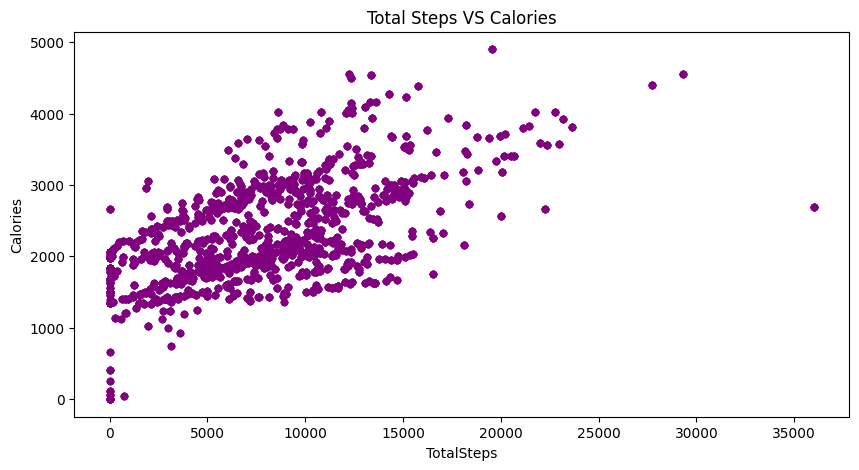

In [54]:
total_daily.plot.scatter(x='TotalSteps', y='Calories', color='purple', alpha=0.5, figsize=(10,5))
plt.title('Total Steps VS Calories')
plt.show()

As we can see on the scatter plot above, there is a positive relationship between the two variables, which indicates that the greater the number of steps taken, the more calories user burns. As mentioned above, keeping active is crucial for maintaining good health, and the number of steps the individual takes daily has a significant impact on that.

# SHARE

All this information now helps us to draw visualizations and infer results from the said visualizations.

In [55]:
category = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

category_type = CategoricalDtype(categories=category, ordered=True)

total_daily['DayOfWeek'] = total_daily['DayOfWeek'].astype(category_type)

weekday = total_daily.groupby('DayOfWeek', observed=False).mean().reindex(category)

weekday.filter(['TotalSteps'])


,TotalSteps
DayOfWeek,
Monday,7750.912917
Tuesday,8115.021662
Wednesday,7593.504995
Thursday,7635.667011
Friday,7449.285319
Saturday,8176.288136
Sunday,6943.197226


## Most active time of the day

We will now determine the average steps and average intensity of each time point of the day.

In [56]:
hourly_activity = total_hourly[['Id', 'Time', 'StepTotal', 'TotalIntensity']]
avg_hourly_activity = (hourly_activity
                       .groupby('Time', as_index=False)
                       .agg(total_steps_mean =('StepTotal','mean'),
                           total_intensity_mean = ('TotalIntensity','mean')))

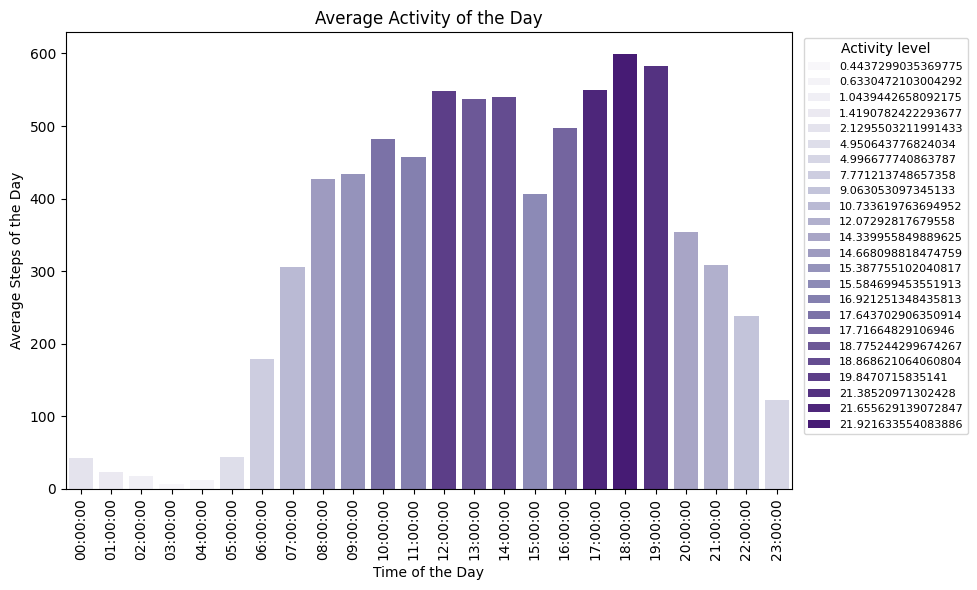

In [57]:
plt.figure(figsize=(10,6))  
barplot = sns.barplot(data=avg_hourly_activity, x='Time', y='total_steps_mean', 
                      hue='total_intensity_mean', palette="Purples", dodge=False)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)

plt.xlabel('Time of the Day', fontsize=10)
plt.ylabel('Average Steps of the Day', fontsize=10)
plt.title('Average Activity of the Day', fontsize=12)

plt.legend(title='Activity level', title_fontsize=10, loc='upper right', 
           bbox_to_anchor=(1.25, 1), fontsize=8, frameon=True)
plt.tight_layout() 
plt.show()

We can see that 17:00 to 19:00 are the most active time of the day, in terms of both intensity and steps. Around 550 to 600 step per 30 mins during that time.

## Average steps & calories burned

Next, we analyse how users spend their time when they are awake, that is, how active are the users during their active time, including sedentary time.

In [58]:
total_daily['total_activity'] = (total_daily['VeryActiveMinutes'] + 
                               total_daily['FairlyActiveMinutes'] + 
                               total_daily['LightlyActiveMinutes'] + 
                               total_daily['SedentaryMinutes'])

total_daily['pct_very_active'] = (total_daily['VeryActiveMinutes'] / total_daily['total_activity']) * 100
total_daily['pct_fairly_active'] = (total_daily['FairlyActiveMinutes'] / total_daily['total_activity']) * 100
total_daily['pct_lightly_active'] = (total_daily['LightlyActiveMinutes'] / total_daily['total_activity']) * 100
total_daily['pct_sedentary'] = (total_daily['SedentaryMinutes'] / total_daily['total_activity']) * 100


avg_daily_activity = total_daily.groupby('DayOfWeek', observed=False).agg(
    pct_very_active_mean=('pct_very_active', 'mean'),
    pct_fairly_active_mean=('pct_fairly_active', 'mean'),
    pct_lightly_active_mean=('pct_lightly_active', 'mean'),
    pct_sedentary_mean=('pct_sedentary', 'mean'),
    total_step_mean=('TotalSteps', 'mean'),
    total_dist_mean=('TotalDistance', 'mean'),
    very_active_mean=('VeryActiveMinutes', 'mean'),
    lightly_active_mean=('LightlyActiveMinutes', 'mean'),
    activity_mean=('total_activity', 'mean'),
    calories_mean=('Calories', 'mean')).reset_index()

activity_long = avg_daily_activity.melt(
    id_vars=['DayOfWeek'],
    value_vars=['pct_very_active_mean', 'pct_fairly_active_mean', 'pct_lightly_active_mean', 'pct_sedentary_mean'],
    var_name='activity_level',
    value_name='percent_activity')

activity_labels = {'pct_very_active_mean': 'Very Active',
    'pct_fairly_active_mean': 'Fairly Active',
    'pct_lightly_active_mean': 'Lightly Active',
    'pct_sedentary_mean': 'Sedentary'}

activity_long['activity_level'] = activity_long['activity_level'].map(activity_labels)


Next, we want to see if users reach their daily steps and calories burned.

According to CDC, average American takes 3,000 to 4,000 steps per day and they recommend 10,000 per day for general health. And thus, many pedometers track to see if users reach 10,000 steps per day.

Medical News Today: [How many steps should people take per day?](http://https://www.medicalnewstoday.com/articles/how-many-steps-should-you-take-a-day)

Mayo Clinics: [10,000 steps a day: Too low? Too high?](http://https://www.mayoclinic.org/healthy-lifestyle/fitness/in-depth/10000-steps/art-20317391)

Studies consider 10,000 steps per day active and is a good baseline. Let's look at how many steps the users have and if they reach 10,000 steps per day.

Reference: [How Many Steps Should You Aim for Each Day?](http://https://www.verywellfit.com/how-many-steps-per-day-are-enough-3432827)

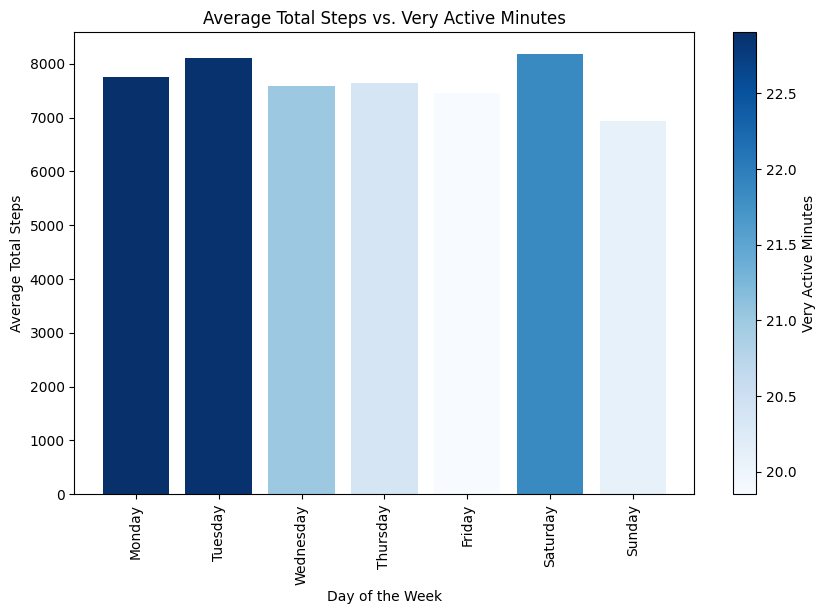

In [59]:
fig, ax = plt.subplots(figsize=(10, 6))

norm = plt.Normalize(vmin=avg_daily_activity['very_active_mean'].min(), 
                      vmax=avg_daily_activity['very_active_mean'].max())

bars = ax.bar(avg_daily_activity['DayOfWeek'], avg_daily_activity['total_step_mean'], 
              color=plt.cm.Blues(norm(avg_daily_activity['very_active_mean'])))

sm = plt.cm.ScalarMappable(cmap='Blues', norm=norm)
sm.set_array([]) 

cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Very Active Minutes')

ax.set_xticks(range(len(avg_daily_activity['DayOfWeek'])))  
ax.set_xticklabels(avg_daily_activity['DayOfWeek'], rotation=90)  

ax.set_xlabel('Day of the Week')
ax.set_ylabel('Average Total Steps')
ax.set_title('Average Total Steps vs. Very Active Minutes')

plt.show()

The fitbit users have higher daily steps than genernal Americans but still lower than the recommended 10,000 steps and less than 30 minutes per day. They may need to increase additional 30 min of activities to reach the goal.

## Percentage of activity in minutes

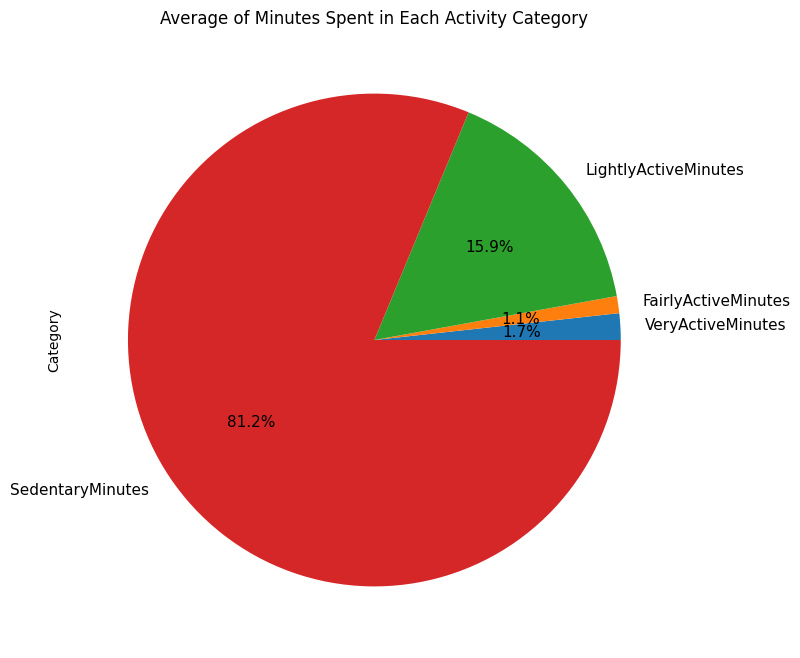

In [60]:
minutes_categories = total_daily[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].mean()
minutes_categories.plot.pie(ylabel='Category', title='Average of Minutes Spent in Each Activity Category',autopct='%1.1f%%', fontsize='11', startangle=0, figsize=(10,8))
plt.show()

This pie chart shows that the users are in a sedentary state of activity most of the time, a sixth of the time doing light activity and only 2% of the time being active doing proper excercise.

# ACT

From the above data, we know that:

1. Users likely workout between 5 - 7 pm each day
2. During the weekdays, 80% of the time, users are sedentary.
3. Averge steps are around 7000 to 82000 steps daily, which are less than the recommended 10,000 steps; active time is also less than the recommended 30 minutes.
4. Calories burned are around 2000 to 2500 each day.

# RECOMMENDATIONS

Based on users life styles, we can try incorporating following features to help build Bellabeat's marketing strategy:

1. Based on hourly step data, the average maximum steps taken in 30 minutes have been analyzed. On average, users take around 7,200 to 8,000 steps per day. This indicates that they may need an additional 30 to 60 minutes of activity per day to reach the recommended 10,000 steps. To help users improve their daily activity gradually, we can incorporate a feature that allows them to set personalized step goals and receive reminders to stay on track.

2. Calories calculator: we can add a feature for users to record their daily calorie consumption and a calories calculator so that they know if net calories is 0 and if they have to burn more calories than they consume when they want to lose weight.

3. Weekly and Monthly Achievement Reports: To keep the users motivated, the Bellabeat app could provide customized weekly and monthly reports regarding the total number of steps, burned calories, sleeping habits, weight loss, and total time spent on the different activity levels. The app could send congratulatory messages to those who keep up with good habits, as well as motivational tips for improvement depending on the user's overall performance.

4. A reward-based point system where users earn points for hitting healthy activity and nutrition goals. These points can be redeemed for vouchers, discounts, or gift cards, encouraging consistent participation. Users can earn points by achieving key health milestones, such as meeting step goals, maintaining a balanced calorie intake, tracking workouts, and ensuring adequate sleep.

5. Introducing a meal plan suggestion feature would provide users with a holistic approach to health and wellness. This feature would offer users tailored meal plans, helping them maintain a balanced diet that aligns with their fitness objectives. By leveraging user data, such as daily step count, intensity levels, and calories burned, the app could generate customized meal suggestions that promote healthier eating habits. 